<a href="https://colab.research.google.com/github/saincoder/Deep_learning_with_tensorflow/blob/main/save_test_load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

***Load the dataset***

In [3]:
#load the data
housing = fetch_california_housing()

***Convert the data to dataframe for easier visualization***

In [4]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target

***Visualizing the data***

In [5]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


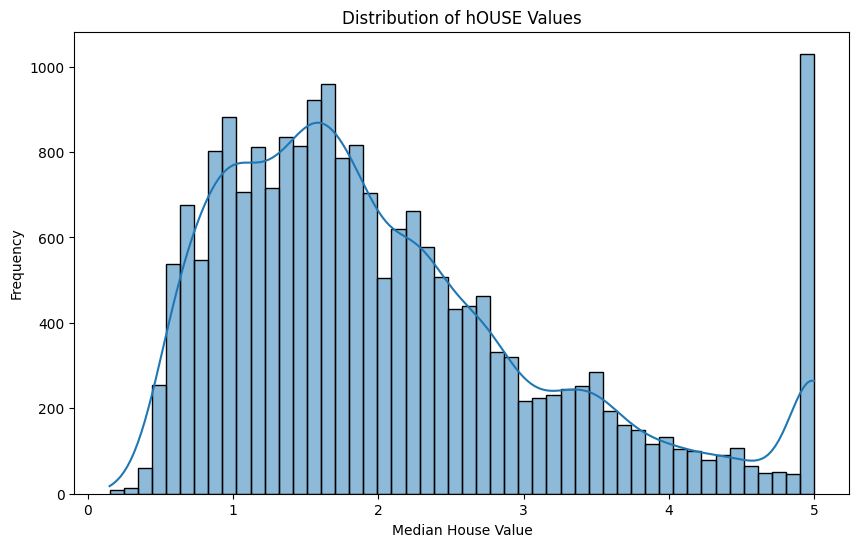

In [6]:
#visualize the distribution of the target varibale

plt.figure(figsize=(10,6))
sns.histplot(housing_df['target'], bins = 50, kde = True)
plt.title('Distribution of hOUSE Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

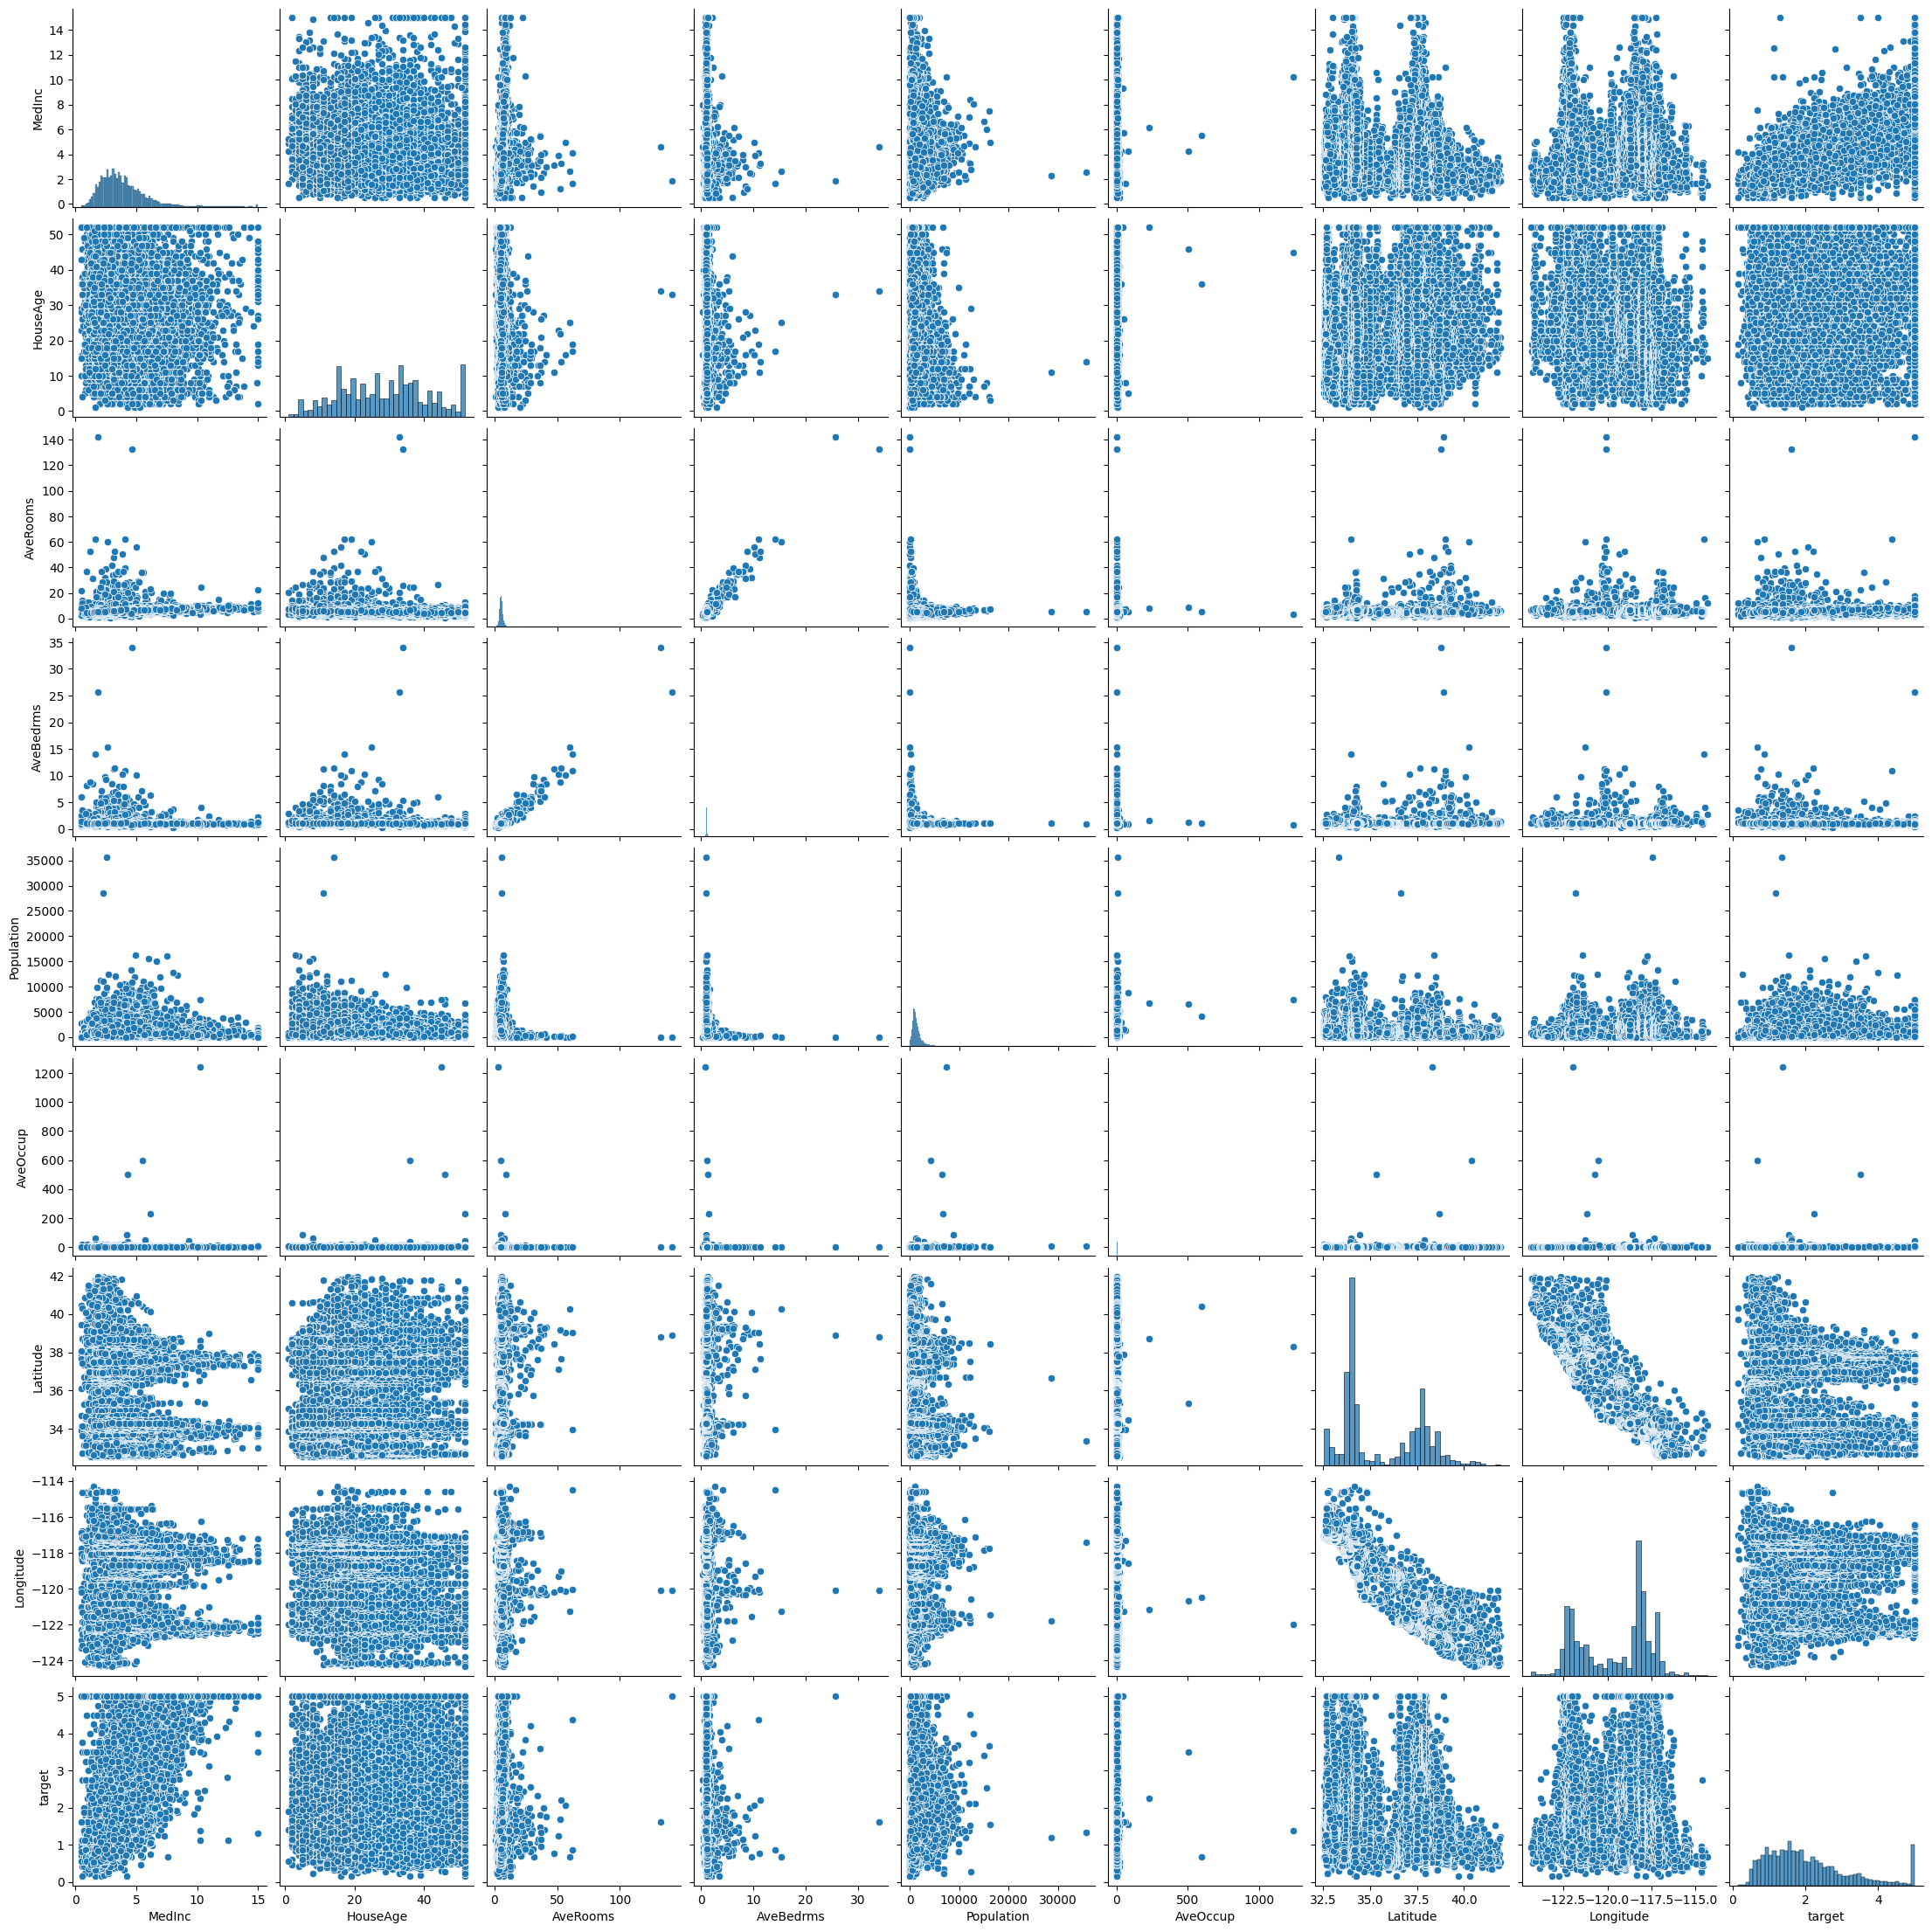

In [7]:
#pairplot of features relationships understanding
sns.pairplot(housing_df)
plt.show()



***Spliting the data into traning data and testing data***

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

***Standardize the data***

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

<Figure size 1000x600 with 0 Axes>

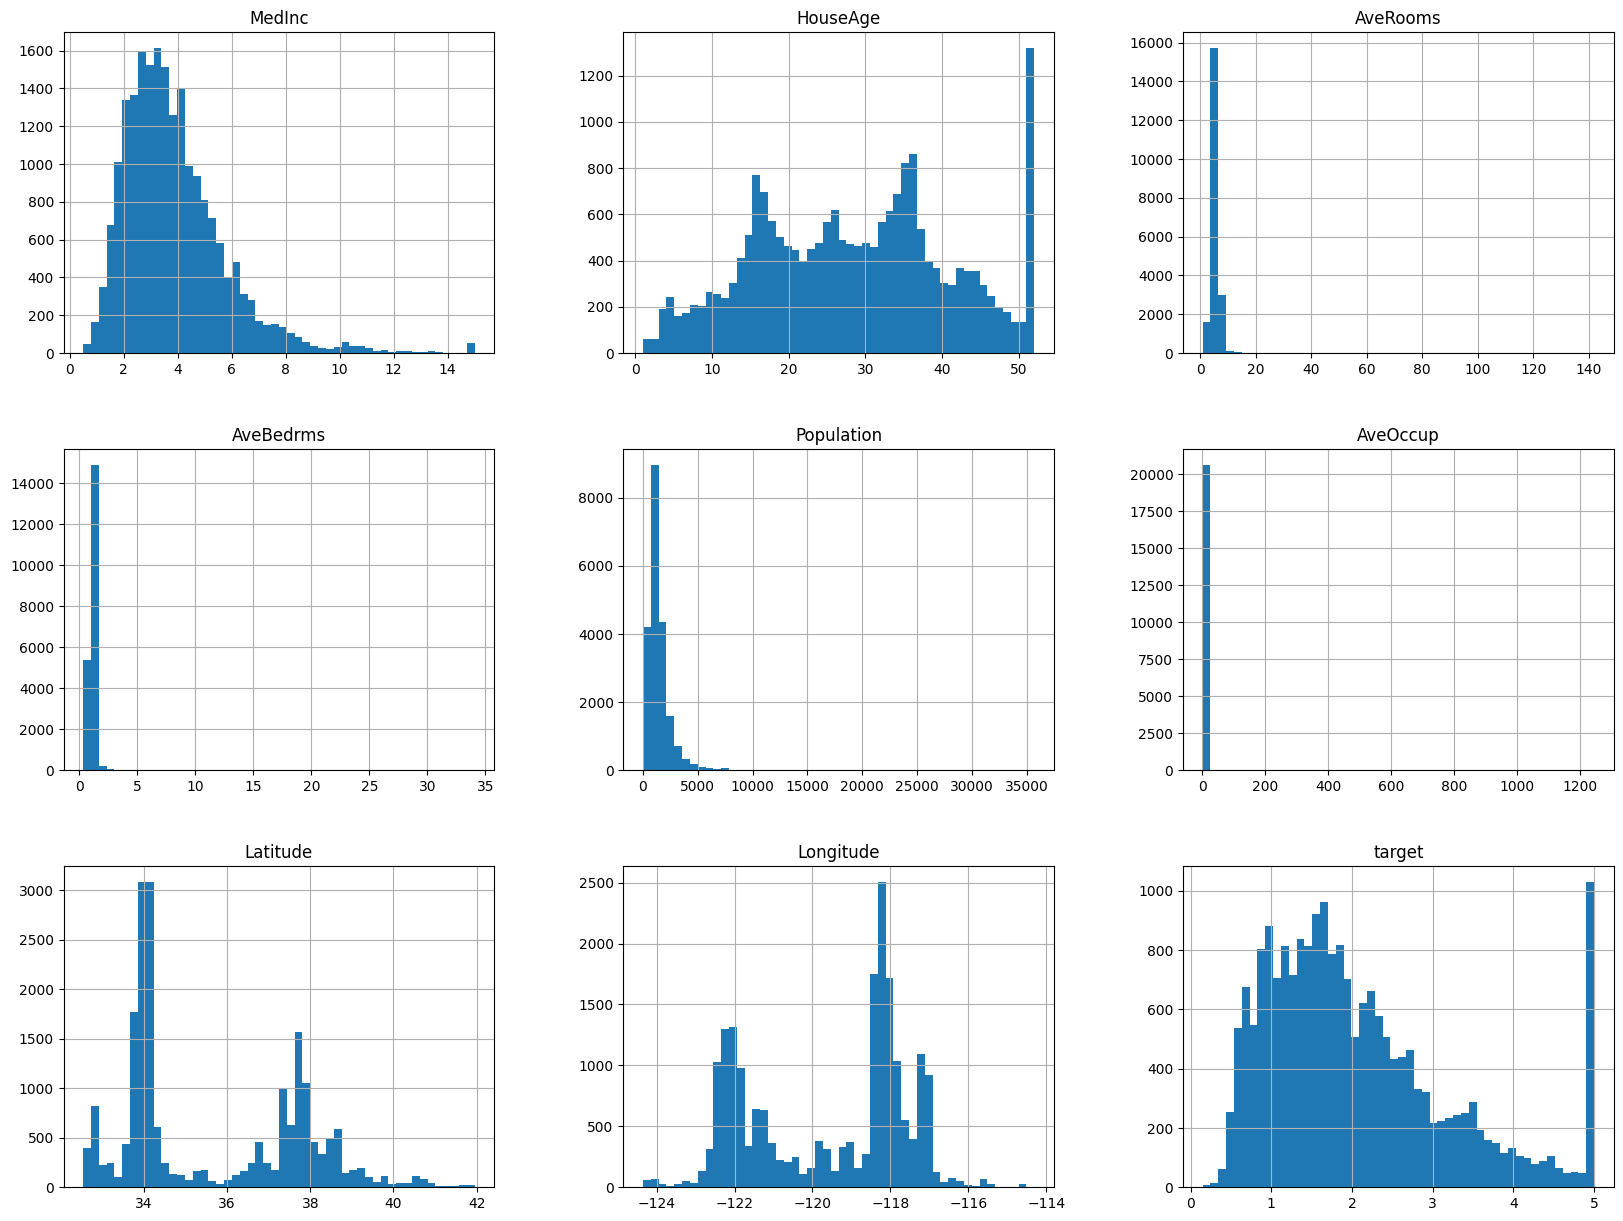

In [11]:
#initial data exploration and visulaization
housing_df.describe().transpose()
plt.figure(figsize=(10,6))
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
#visualizing the first few scaled training data points
scaled_train_df = pd.DataFrame(X_train, columns=housing.feature_names)
scaled_train_df['target'] = y_train
scaled_train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,-0.193979,-1.077813,-0.943385,0.014853,0.020733,-0.572916,0.929260,-1.422155,1.442
1,0.751983,-1.868895,0.405478,-0.233277,1.861465,0.205165,-0.916547,1.096670,1.687
2,-0.414691,0.029701,0.818088,1.056784,-0.087867,-0.299833,1.308729,-1.697027,1.621
3,1.718896,-1.315138,0.326644,-0.219551,-0.337922,-0.111466,-0.982134,0.941742,2.621
4,-0.962072,-1.236030,-0.056258,-0.031244,1.709059,-0.302570,-0.804112,1.326562,0.956


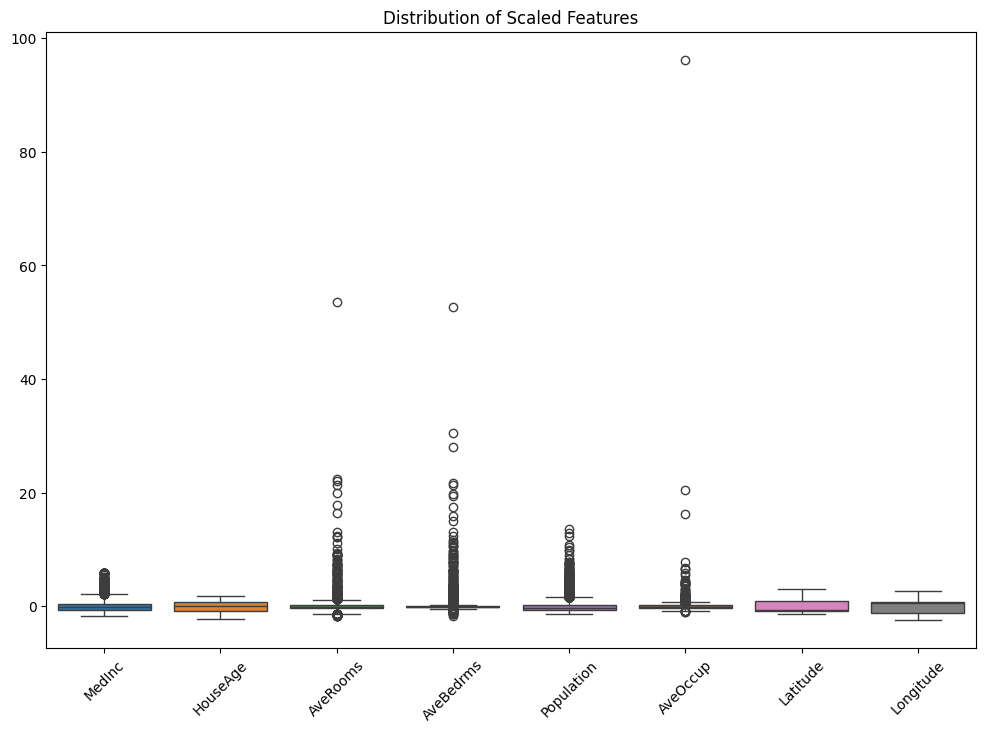

In [13]:
#Visualizing the distribution of the scaled features
plt.figure(figsize=(12,8))
sns.boxplot(data=scaled_train_df.drop(columns=['target']))
plt.title('Distribution of Scaled Features')
plt.xticks(rotation=45)
plt.show()

***Model***

In [14]:
#Initializing a simple sequential model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation= 'relu', input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#Compile the model
model.compile(
    loss='mean_squared_error',
    optimizer='sgd',
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(name = 'mae'),
        tf.keras.metrics.RootMeanSquaredError(name = 'rmse'),
        tf.keras.metrics.MeanSquaredError(name = 'mse')
    ]

)

In [16]:
#train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1427 - mae: 0.7526 - mse: 1.1427 - rmse: 1.0466 - val_loss: 4.1360 - val_mae: 0.5362 - val_mse: 4.1360 - val_rmse: 2.0337
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5040 - mae: 0.4938 - mse: 0.5040 - rmse: 0.7098 - val_loss: 6.4486 - val_mae: 0.5269 - val_mse: 6.4486 - val_rmse: 2.5394
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4400 - mae: 0.4671 - mse: 0.4400 - rmse: 0.6633 - val_loss: 1.5841 - val_mae: 0.4716 - val_mse: 1.5841 - val_rmse: 1.2586
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4396 - mae: 0.4601 - mse: 0.4396 - rmse: 0.6628 - val_loss: 0.3993 - val_mae: 0.4394 - val_mse: 0.3993 - val_rmse: 0.6319
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3903 - mae: 0.4436 - mse: 0.3903 - rmse: 0.6246 - val_loss: 0.3919 - val_mae: 0.4308 - val_mse: 0.3919 - val_rmse: 0.6260
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3949 - mae: 0.4434

In [17]:
# Evaluating the model
test_result = model.evaluate(X_test, y_test, return_dict=True)
print(f"Test Loss: {test_result}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3484 - mae: 0.4146 - mse: 0.3484 - rmse: 0.5901
Test Loss: {'loss': 0.3460930287837982, 'mae': 0.4143480956554413, 'mse': 0.3460930287837982, 'rmse': 0.5882967114448547}


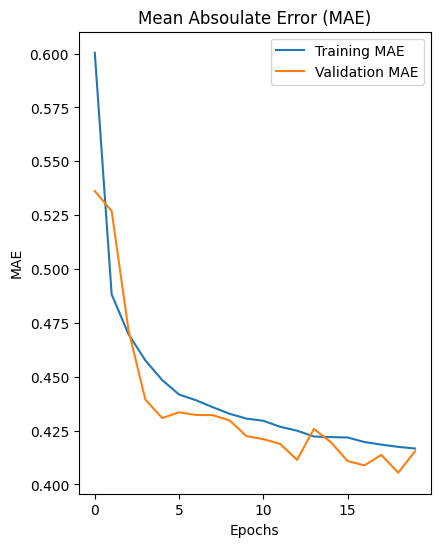

In [18]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absoulate Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

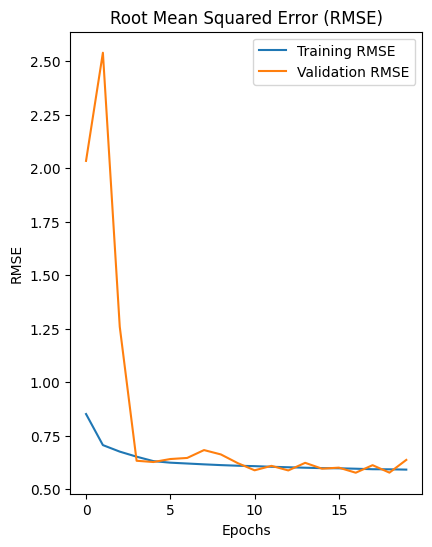

In [19]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,2)
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

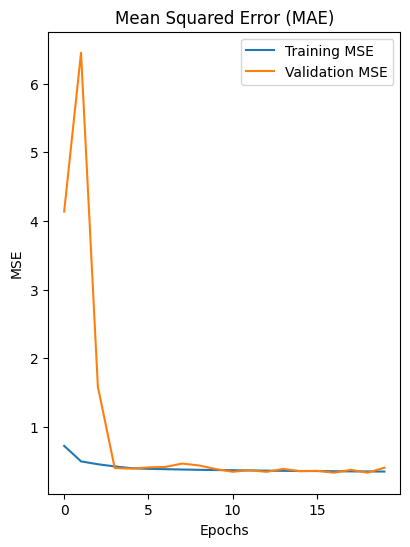

In [20]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

***Save test and load the model***

In [21]:
#save the model
model.save('trained_model.h5')


In [22]:
#load the model
model = tf.keras.models.load_model('trained_model.h5')

In [23]:
# Evaluate the loaded model that is it correct or not
load_test_result = model.evaluate(X_test, y_test, return_dict=True)
print(f"Test Loss: {load_test_result}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3484 - mae: 0.4146 - mse: 0.3484 - rmse: 0.5901
Test Loss: {'loss': 0.3460930287837982, 'mae': 0.4143480956554413, 'mse': 0.3460930287837982, 'rmse': 0.5882967114448547}


In [30]:
#compare the prediction from original and loaded model
original_pred = model.predict(X_test)
loaded_pred = model.predict(X_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
# Assert to verify that the predictions are the same
assert tf.reduce_all(tf.abs(original_pred - loaded_pred) < 1e-5), "Predictions differ between original and loaded models!"

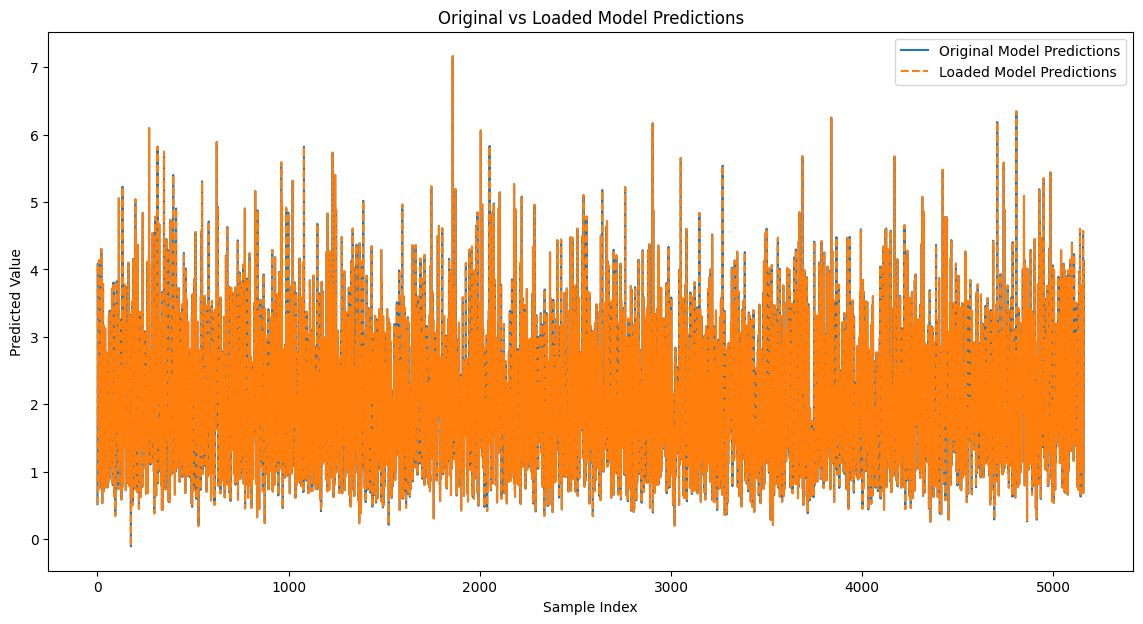

In [32]:
# Visualization of original and loaded model predictions
plt.figure(figsize=(14, 7))
plt.plot(original_pred, label='Original Model Predictions')
plt.plot(loaded_pred, label='Loaded Model Predictions', linestyle='dashed')
plt.title('Original vs Loaded Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.legend()